<a href="https://colab.research.google.com/github/aquarius31/Crime-Predictor/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn 
import datetime
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
#df = pd.read_csv('gdrive/My Drive/Crime Predictor/OSN_data.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
crimes_2001 = pd.read_csv('gdrive/My Drive/Crime Predictor/Chicago_Crimes_2001_to_2004.csv', sep=',', error_bad_lines=False)
crimes_2005 = pd.read_csv('gdrive/My Drive/Crime Predictor/Chicago_Crimes_2005_to_2007.csv', sep=',', error_bad_lines=False)
crimes_2008 = pd.read_csv('gdrive/My Drive/Crime Predictor/Chicago_Crimes_2008_to_2011.csv', sep=',', error_bad_lines=False)
crimes_2012 = pd.read_csv('gdrive/My Drive/Crime Predictor/Chicago_Crimes_2012_to_2017.csv', sep=',', error_bad_lines=False)
frames = [crimes_2001, crimes_2005, crimes_2008, crimes_2012]

b'Skipping line 1513591: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [0]:
police_df = pd.read_csv('gdrive/My Drive/Crime Predictor/Police_Stations.csv', sep=',')

In [0]:
# Remove typing errors
for csv in frames:
    csv['Latitude'] = pd.to_numeric(csv['Latitude'], errors='coerce')
    csv['Y Coordinate'] = pd.to_numeric(csv['Y Coordinate'], errors='coerce')
    csv = csv[(csv['Year'] >= 2001) & ((csv['Latitude'] >= 40) | (csv['Latitude'] == 0))
                      & ((csv['Year'] >= -90) | (csv['Latitude'] == 0))]

In [0]:
# Drop useless column
for csv in frames:
    csv = csv.drop(['Unnamed: 0'], axis=1)

In [0]:
# Calculate the distance between two geopoints
def distanceBetweenPlaces(lat1, lon1, lat2, lon2):
    # convert decimal degrees to radians 
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km

In [0]:
# Determine the closest police station
def closestPoliceStation(lat, lon):
    minD = 100
    for row in police_df.itertuples():
        dist = distanceBetweenPlaces(row[13], row[14], lat, lon)
        if(dist < minD):
            minD = dist
    return minD

In [0]:
# Extract hour from date colum
def extractHours(row):
    date, time, half = row.split()
    h = int(time[0:2])
    if(half == 'AM'):
        return h
    if((half == 'PM') & (h == 0)):
        return 0
    if(half == 'PM'):
        return h+12

In [12]:
# Compute and add hour column
for csv in frames:
    a = datetime.datetime.now().replace(microsecond=0)
    csv['Hour'] = csv.apply(lambda row: extractHours(row['Date']), axis=1)
    b = datetime.datetime.now().replace(microsecond=0)
    t = b-a
    print("Done in ", t)

Done in  0:00:38
Done in  0:00:36
Done in  0:00:53
Done in  0:00:29


In [16]:
# Add distance to closest police station column
i = 1
for csv in frames:
    a = datetime.datetime.now().replace(microsecond=0)
    print("Hi")
    csv['Closest police station'] = csv.apply(
        lambda row: closestPoliceStation(row['Latitude'], row['Longitude']), axis=1)
    print("Hi")
    b = datetime.datetime.now().replace(microsecond=0)
    t = b-a
    print(i, " Done in ", t)
    i += 1
    name = (str)(i)
    name += '.csv'
    csv.to_csv(path_or_buf=name)

Hi
Hi
1  Done in  1:34:21
Hi
Hi
2  Done in  1:31:25
Hi
Hi
3  Done in  2:10:39
Hi
Hi
4  Done in  1:10:42


In [17]:
from google.colab import files
files.download('1.csv')

FileNotFoundError: ignored

In [0]:
crimes_df = pd.concat(frames)

In [0]:
crimes_df.to_csv(path_or_buf='crimes_stacked.csv')

In [0]:
# We take a random sample to take a look at the data
sample = crimes_df.sample(frac=0.01)

In [22]:
# Shape
print(sample.shape)

(79413, 25)


In [23]:
# Types
sample.dtypes

Unnamed: 0                  int64
ID                          int64
Case Number                object
Date                       object
Block                      object
IUCR                       object
Primary Type               object
Description                object
Location Description       object
Arrest                       bool
Domestic                     bool
Beat                        int64
District                  float64
Ward                      float64
Community Area            float64
FBI Code                   object
X Coordinate              float64
Y Coordinate              float64
Year                      float64
Updated On                 object
Latitude                  float64
Longitude                 float64
Location                   object
Hour                        int64
Closest police station    float64
dtype: object

In [24]:
# Head
sample.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Hour,Closest police station
1361112,4965405,3019550,HJ683578,10/10/2003 04:25:00 AM,0000X N KEDZIE AVE,2027,NARCOTICS,POSS: CRACK,VACANT LOT/LAND,True,...,18,1155039.0,1900294.0,2003.0,04/15/2016 08:55:02 AM,41.882217,-87.706157,"(41.882217275, -87.706156658)",4,0.961157
1344799,6123964,10659684,HZ409354,06/27/2016 01:00:00 AM,049XX W HURON ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,...,26,NaN,NaN,2016.0,08/28/2016 03:49:25 PM,NaN,NaN,NaN,1,100.000000
2257731,1984661,7756649,HS559681,10/11/2010 08:00:00 PM,055XX S ROCKWELL ST,0560,ASSAULT,SIMPLE,APARTMENT,False,...,08A,1159980.0,1867781.0,2010.0,02/04/2016 06:33:39 AM,41.792897,-87.688909,"(41.792897439, -87.688908967)",20,2.263473
1764894,5365576,3525595,HK604990,09/05/2004 08:36:00 PM,062XX S WOODLAWN AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,SIDEWALK,False,...,15,1185289.0,1863864.0,2004.0,04/15/2016 08:55:02 AM,41.781591,-87.596228,"(41.781590778, -87.596227707)",20,1.860246
1413402,5017995,3084827,HJ808496,12/09/2003 07:45:00 PM,056XX S PAULINA ST,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,14,1165974.0,1867237.0,2003.0,04/15/2016 08:55:02 AM,41.791279,-87.666945,"(41.791279238, -87.666945075)",19,1.388280


In [25]:
# Descriptions
sample.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Hour,Closest police station
count,7.941300e+04,7.941300e+04,79413.000000,79412.000000,72492.000000,72474.000000,7.833600e+04,7.833600e+04,79413.000000,78336.000000,78336.000000,79413.000000,79413.000000
mean,2.667587e+06,5.934517e+06,1198.037538,11.319209,22.574132,37.794216,1.164363e+06,1.885471e+06,2007.683402,41.841329,-87.672365,14.565436,3.315735
std,1.816510e+06,2.564439e+06,701.799368,6.928586,13.757450,21.539237,1.822009e+04,3.414667e+04,4.059644,0.094015,0.065594,6.397262,11.420094
min,3.200000e+01,6.440000e+02,111.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566,1.000000,0.000161
25%,1.157350e+06,3.873300e+06,623.000000,6.000000,10.000000,23.000000,1.152884e+06,1.859066e+06,2005.000000,41.768703,-87.713997,10.000000,1.221201
50%,2.271278e+06,6.171251e+06,1111.000000,10.000000,22.000000,32.000000,1.165764e+06,1.890059e+06,2008.000000,41.853888,-87.666959,15.000000,1.860067
75%,4.177227e+06,7.720223e+06,1731.000000,17.000000,34.000000,58.000000,1.176273e+06,1.909216e+06,2010.000000,41.906681,-87.628804,20.000000,2.531389
max,6.254043e+06,1.082595e+07,2535.000000,31.000000,50.000000,77.000000,1.205117e+06,1.951532e+06,2017.000000,42.022644,-87.524529,24.000000,100.000000


In [26]:
# Class distribution
print(crimes_df.groupby('Primary Type').size())

Primary Type
ARSON                                  13097
ASSAULT                               481661
BATTERY                              1442716
BURGLARY                              470958
CONCEALED CARRY LICENSE VIOLATION         90
CRIM SEXUAL ASSAULT                    29868
CRIMINAL DAMAGE                       923000
CRIMINAL TRESPASS                     229366
DECEPTIVE PRACTICE                    280931
DOMESTIC VIOLENCE                          2
GAMBLING                               18806
HOMICIDE                                9051
HUMAN TRAFFICKING                         28
INTERFERENCE WITH PUBLIC OFFICER       15710
INTIMIDATION                            4636
KIDNAPPING                              7756
LIQUOR LAW VIOLATION                   17513
MOTOR VEHICLE THEFT                   370548
NARCOTICS                             885431
NON - CRIMINAL                            38
NON-CRIMINAL                              97
NON-CRIMINAL (SUBJECT SPECIFIED)          

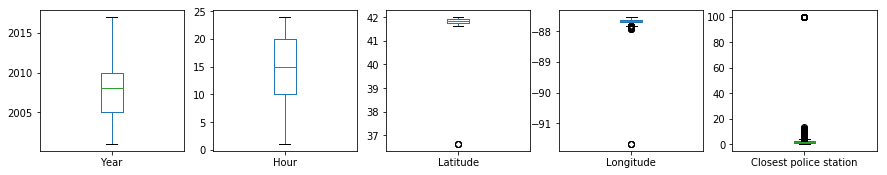

In [27]:
# Box and whisker plots
sample[['Year', 'Hour', 'Latitude', 'Longitude', 'Closest police station']].plot(
    kind='box', subplots=True, layout=(5,5), figsize=(15,15), sharex=False, sharey=False)
plt.show()

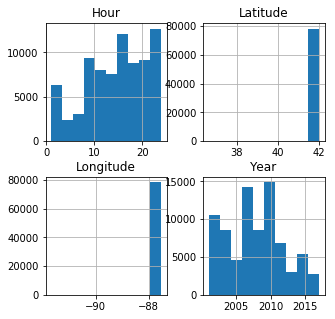

In [28]:
# Histograms
sample[['Year', 'Hour', 'Latitude', 'Longitude']].hist(figsize=(5,5))
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


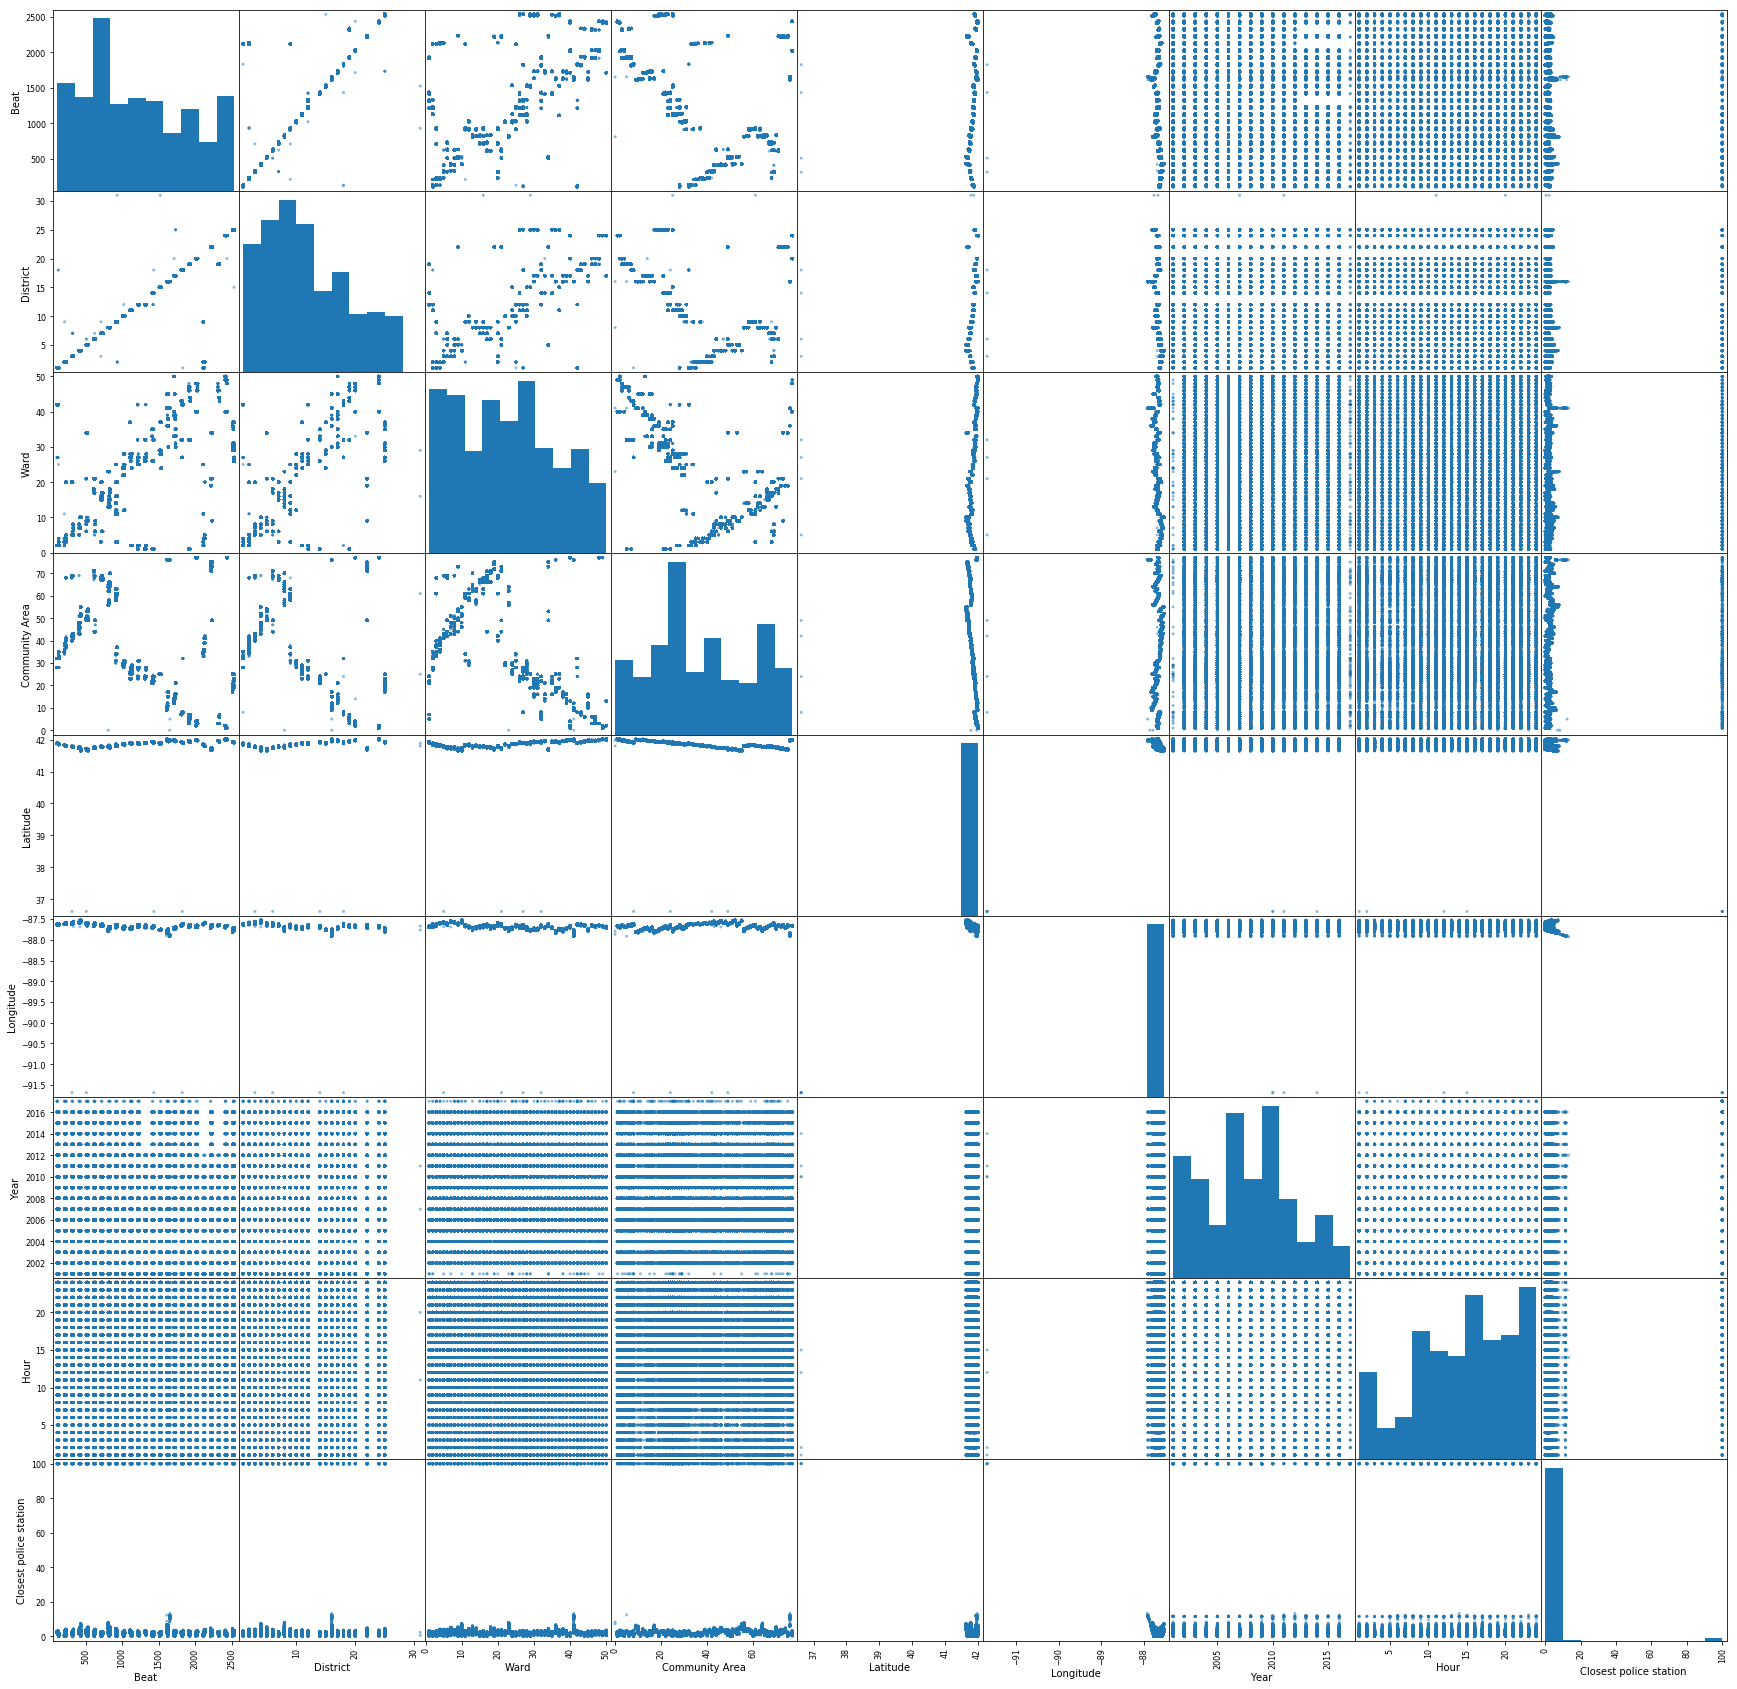

In [29]:
# Scatter plot matrix
scatter_matrix(sample[['Beat', 'District', 'Ward', 'Community Area', 'Latitude', 'Longitude',
                      'Year', 'Hour', 'Closest police station']], figsize=(30, 30))
plt.show()